In [1]:
import twitter, re, datetime, pandas as pd
import numpy as np
import pandas as pd
from datetime import timedelta
from email.utils import parsedate_tz
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
def to_datetime(datestring):
    time_tuple = parsedate_tz(datestring.strip())
    dt = datetime.datetime(*time_tuple[:6])
    return dt - timedelta(seconds=time_tuple[-1])

In [3]:
class twitterminer():
    #rl   =   request_limit    
    api             =   False
    data            =   []
    
    twitter_keys = {
    'consumer_key': 'JsQ2q7f2qGSmkhdpeYsgrzDzv'      , #add your consumer key
    'consumer_secret': 'UEQUIwH3D2WJtGfDdwLZNcQ2tFYEFJFZYDsX8W3Lj8N7BPBBia'    , #add your consumer secret key
    'access_token_key': '35349106-gCEDJfBQJQ12FFtqjxfZ60sH9UG7OqE782x8Qb3sZ'   , #add your access token key
    'access_token_secret':  '1hzOfbjeyoyKoffR6sbwDj3UD4PoDJQapA8ADlvg2y7it'  #add your access token secret key
    }
    
    def __init__(self,  request_limit):
        
        self.request_limit = request_limit
        
        # This sets the twitter API object for use internall within the class
        self.set_api()
        
    def set_api(self):
        self.api = twitter.Api(
        consumer_key         =   self.twitter_keys['consumer_key'],
        consumer_secret      =   self.twitter_keys['consumer_secret'],
        access_token_key     =   self.twitter_keys['access_token_key'],
        access_token_secret  =   self.twitter_keys['access_token_secret']
    )
        

    def mine_user_tweets(self, user=" set default user to get data from", mine_retweets=False):
        statuses   =   self.api.GetUserTimeline(screen_name=user, count=self.request_limit,include_rts=False)
        data       =   []

        for item in statuses:
            

            mined = {
                'tweet_id': item.id,
                'handle': item.user.name,
                'screen_name': item.user.screen_name,
                'retweet_count': item.retweet_count,
                'followers_count':  item.user.followers_count,
                'text': item.text,
                'user_mentions': ', '.join([h.name for h in item.user_mentions]),
                'hashtags': ', '.join([h.text for h in item.hashtags]),
                'favorited': item.favorited,
                'mined_at': datetime.datetime.now(),
                'created_at': item.created_at,
            }

            data.append(mined)

                      
        return data

In [6]:
api = twitter.Api( consumer_key = 'JsQ2q7f2qGSmkhdpeYsgrzDzv', #add your consumer key
                  consumer_secret = 'UEQUIwH3D2WJtGfDdwLZNcQ2tFYEFJFZYDsX8W3Lj8N7BPBBia', #add your consumer secret key
                  access_token_key = '35349106-gCEDJfBQJQ12FFtqjxfZ60sH9UG7OqE782x8Qb3sZ'  , #add your access token key
                  access_token_secret = '1hzOfbjeyoyKoffR6sbwDj3UD4PoDJQapA8ADlvg2y7it'  #add your access token secret key
                 )

In [9]:
users = api.GetFriends()
print(dir(users[0]))

['AsDict', 'AsJsonString', 'NewFromJsonDict', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_json', 'contributors_enabled', 'created_at', 'default_profile', 'default_profile_image', 'description', 'email', 'favourites_count', 'followers_count', 'following', 'friends_count', 'geo_enabled', 'id', 'id_str', 'lang', 'listed_count', 'location', 'name', 'notifications', 'param_defaults', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_banner_url', 'profile_image_url', 'profile_image_url_https', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_ba

In [10]:
users = [(u.screen_name, u.followers_count) for u in users]
users_df = pd.DataFrame(users)
users_df.columns=['screen_name','followers_count']
users_df.head()

,screen_name,followers_count
0,conservmillen,118664
1,Imamofpeace,230921
2,jockowillink,216821
3,brian_armstrong,241906
4,Ocasio2018,780816


In [11]:
#get last 100 tweets for each user I follow
miner = twitterminer(request_limit = 100)
users = api.GetFriends()
users = [(u.screen_name, u.followers_count) for u in users]
tweets_all = []

for u in users:
    tweets_user = miner.mine_user_tweets(u[0])
    tweets_all.extend(tweets_user)

In [12]:
#Create dataframes
tweets_df = pd.DataFrame(tweets_all)
tweets_df['retweet_ratio'] = (tweets_df['retweet_count']/tweets_df['followers_count'])*10000

In [25]:
#add create date in date format
created_date = [to_datetime(t).date() for t in tweets_df['created_at']]
tweets_df['created_date'] = created_date
tweets_df.head()

,created_at,favorited,followers_count,handle,hashtags,mined_at,retweet_count,screen_name,text,tweet_id,user_mentions,retweet_ratio,created_date
0,Sat Aug 04 22:23:27 +0000 2018,False,118664,Allie Beth Stuckey,,2018-08-04 22:38:07.236216,232,conservmillen,I’m beginning to think some on the left just d...,1025869853457043456,,19.551001,2018-08-04
1,Sat Aug 04 16:40:14 +0000 2018,False,118664,Allie Beth Stuckey,,2018-08-04 22:38:07.236216,0,conservmillen,"@DarthExegete Oh, yes. Yes, I have.",1025783479777325056,Eh! Stephen!,0.000000,2018-08-04
2,Sat Aug 04 15:53:36 +0000 2018,False,118664,Allie Beth Stuckey,,2018-08-04 22:38:07.236216,11,conservmillen,Wise strategy my friend 😈😈 https://t.co/IZmIpV...,1025771742801940480,,0.926987,2018-08-04
3,Fri Aug 03 17:23:59 +0000 2018,False,118664,Allie Beth Stuckey,,2018-08-04 22:38:07.236216,0,conservmillen,@fitsumbelay @sgdc_man @cabot_phillips ....why...,1025432103205449729,"🇪🇹🇺🇸🤙🏾ፍፁም በላይ, SGDC Man, Cabot Phillips",0.000000,2018-08-03
4,Fri Aug 03 17:23:02 +0000 2018,False,118664,Allie Beth Stuckey,,2018-08-04 22:38:07.236216,0,conservmillen,@FrankelJeremy @cabot_phillips Yes!,1025431862519508992,"Jeremy Frankel, Cabot Phillips",0.000000,2018-08-03


In [37]:
#filter on date and sort by retweet ratio
mask = (tweets_df['created_date'] > datetime.datetime.strptime('2018-06-21', "%Y-%m-%d").date()) & \
       (tweets_df['created_date'] <= datetime.datetime.strptime('2018-08-04', "%Y-%m-%d").date()) & \
       (tweets_df['followers_count'] > 1000) 

df = tweets_df.loc[mask].sort_values('retweet_ratio',ascending=False)

In [38]:
result = df.sort_values(['retweet_ratio'], ascending = [False]).head(300).groupby(['handle'])['retweet_ratio'].aggregate(np.mean).reset_index().sort_values('retweet_ratio',ascending=[False])
result.head()

,handle,retweet_ratio
35,Munroe Bergdorf 🌹🌹,375.915310
38,Reza Aslan,184.193151
41,Scott Adams,176.166898
44,Thomas Sowell,165.666847
12,Chris Hedges,148.853604


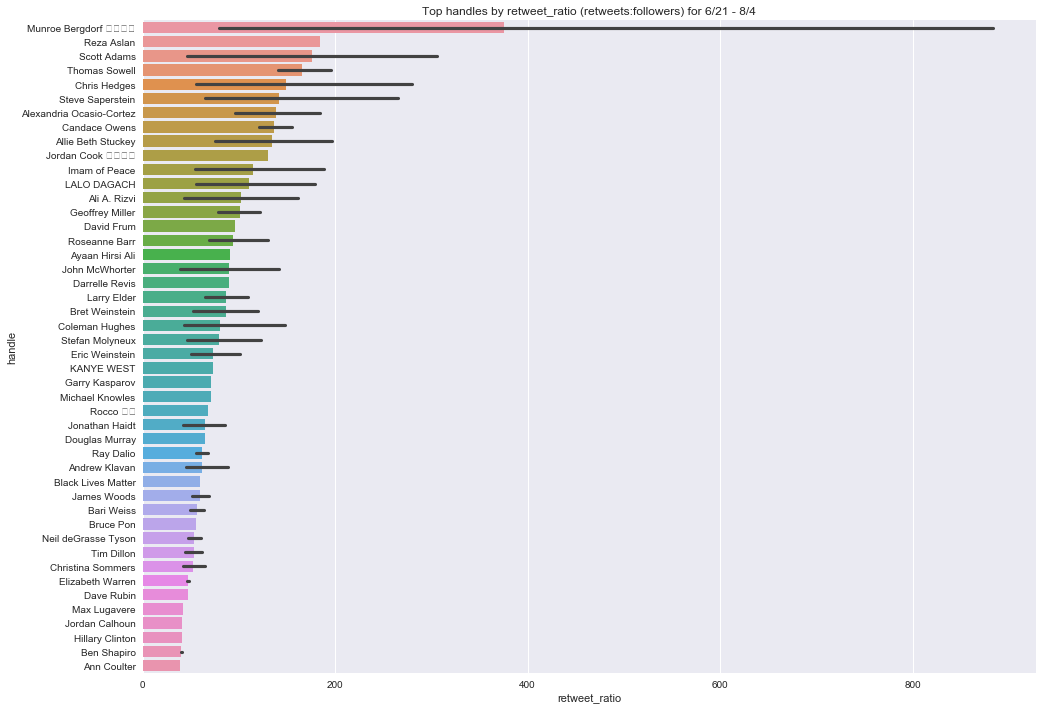

In [43]:
plt.figure(figsize=(16, 12))
sns.barplot(x='retweet_ratio', y='handle', data=df.sort_values(['retweet_ratio'], ascending = [False]).head(300), order=result['handle'])
plt.title('Top handles by retweet_ratio (retweets:followers) for 6/21 - 8/4')
sns.set(style="darkgrid")
plt.show()

In [48]:
print(df['text'][4328])
#tea

Well... This is the real tea... https://t.co/VbKXgCejQf


In [50]:
result.head(10)

,handle,retweet_ratio
35,Munroe Bergdorf 🌹🌹,375.915310
38,Reza Aslan,184.193151
41,Scott Adams,176.166898
44,Thomas Sowell,165.666847
12,Chris Hedges,148.853604
43,Steve Saperstein,141.313784
0,Alexandria Ocasio-Cortez,138.946038
11,Candace Owens,136.603265
2,Allie Beth Stuckey,134.870607
29,Jordan Cook 🇺🇸,130.520293


In [40]:
statuses = api.GetUserTimeline(screen_name='SteveSaperstein', count=100, include_rts=False)

In [41]:
print([s.hashtags for s in statuses])
print([s.retweet_count for s in statuses])
print([s.text for s in statuses])


statuses[22]

[[], [], [Hashtag(Text='coneyisland')], [Hashtag(Text='BayRidge')], [Hashtag(Text='believeinsteve')], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [Hashtag(Text='retweet'), Hashtag(Text='Republican')], [], [], [], [], [], [], [], [], [], [Hashtag(Text='LGBT')], [], [], [], [], [], [], [], [], [], [], [Hashtag(Text='Socialism')], [], [Hashtag(Text='RedWave2018')], [], [], [], [], [], [], [], [], [], [], []]
[0, 1, 1, 1, 1, 0, 15, 0, 6, 2, 0, 0, 1, 0, 1, 7, 12, 5, 4, 1, 1, 8, 0, 23, 5, 128, 1, 1, 0, 13, 6, 0, 5, 7, 2, 3, 0, 1, 1, 0, 1, 7, 6, 0, 20, 1, 4, 5, 35, 3, 3, 5, 0, 0, 8, 11, 6, 3]
['Babushka Ida’s training and orientation for the new election cycle is complete. Many thanks and love you!… https://t.co/mZseKcXJAm', "“Venezuela is doubling down on the poison that's killing it.” https://t.co/nIkQdPcKI0 via @nypost I guess New York’… https://t.co/QDWy1LoKOf", 'https://t.co/RC7gOxC7hK. These are serious and damaging allegations that must be investigated thoro

Status(ID=1020013225956532224, ScreenName=SteveSaperstein, Created=Thu Jul 19 18:31:18 +0000 2018, Text='Way to go @Starbucks! @KenGlassNYC https://t.co/lUM7pRfTeY')

In [42]:
print(dir(statuses[0]))

['AsDict', 'AsJsonString', 'NewFromJsonDict', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_json', 'contributors', 'coordinates', 'created_at', 'created_at_in_seconds', 'current_user_retweet', 'favorite_count', 'favorited', 'full_text', 'geo', 'hashtags', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'location', 'media', 'param_defaults', 'place', 'possibly_sensitive', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'retweet_count', 'retweeted', 'retweeted_status', 'scopes', 'source', 'text', 'truncated', 'tweet_mode', 'urls', 'user', 'user_mentions', 'withheld_copyright', 'withheld_in_countries', 'withheld_scope']
